In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#used matplotlib for all of the plotting
import matplotlib.pyplot as plt
import numpy as np

#used to create the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#Used to save figures
from matplotlib.backends.backend_pdf import PdfPages

In [66]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulfates', 'alcohol', 'quality']
# load dataset
red = pd.read_csv('winequality-red.csv', delimiter = ',', header=None, names=col_names)

In [67]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
#split dataset in features and target variable
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','total sulfur dioxide','density','sulfates', 'alcohol']
X = red[feature_cols] # Features
y = red.quality # Target variable

In [48]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [49]:
def gini(X_train, y_train): 
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
    random_state = 100,max_depth=10, min_samples_leaf=10) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [50]:
def entropy(X_train, y_train):
    
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 10) 
  
    #Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [51]:
def prediction(clf_model, X_test):
    # Predicton on test with giniIndex 
    y_pred = clf_model.predict(X_test) 
    print("Predicted values:") 
    print(y_pred)
    return y_pred

In [52]:
clf_gini = gini(X_train, y_train) 
clf_entropy = entropy(X_train, y_train) 

In [53]:
# Prediction using gini 
y_pred_gini = prediction(clf_gini, X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))

Predicted values:
[5 6 7 6 6 7 6 5 6 5 6 5 6 7 6 5 6 6 5 5 5 6 5 6 5 6 7 6 5 6 5 7 5 6 5 6 5
 6 6 5 6 5 5 5 5 6 5 6 6 6 5 5 7 5 5 6 5 6 6 5 6 5 6 5 5 6 6 5 6 7 5 6 5 6
 5 5 6 5 5 6 7 5 5 6 6 5 5 7 5 6 5 6 5 7 6 6 7 5 5 5 5 6 6 5 5 6 5 6 5 5 7
 5 6 6 5 7 5 5 5 6 5 6 5 6 5 6 6 6 6 6 5 6 7 5 5 6 6 7 5 6 5 5 6 6 5 5 6 5
 6 6 5 7 5 6 6 6 6 6 5 5 7 6 5 5 6 6 6 5 5 5 5 5 5 5 6 5 6 5 5 6 6 6 7 5 6
 6 7 5 6 5 5 7 6 5 5 5 6 5 6 5 6 5 6 5 7 6 5 5 6 6 5 7 6 6 5 5 5 5 5 6 5 5
 6 5 6 5 5 6 7 5 6 6 6 6 5 5 7 5 5 5 6 5 6 6 5 6 6 5 5 6 5 5 6 6 6 5 5 5 6
 6 6 5 6 5 5 6 6 5 6 6 5 6 5 7 5 5 5 5 5 6 6 7 5 5 6 5 6 5 5 5 6 6 6 5 7 6
 5 7 5 5 5 6 5 6 5 6 5 6 6 5 5 6 6 5 6 6 5 5 6 7 6 6 7 5 5 5 5 7 6 6 7 5 5
 6 6 5 6 6 5 5 5 5 5 5 6 7 6 5 5 5 7 7 6 7 5 5 6 7 6 5 5 6 5 6 5 5 5 5 6 5
 5 6 5 5 5 6 6 7 5 7 6 5 6 5 6 6 5 6 6 5 5 5 6 6 5 6 5 6 5 5 6 5 6 6 5 6 5
 5 5 6 5 5 6 5 6 6 6 7 6 6 6 6 6 6 5 5 7 6 5 7 5 5 5 5 5 5 6 6 5 6 7 5 6 7
 6 5 5 5 5 5 5 5 5 5 6 5 6 5 7 5 5 5 5 7 6 6 5 5 6 7 6 5 5 7 5 6 6 6 6 7]
Accuracy

In [ ]:
# Prediction using entropy
y_pred_entropy = prediction(clf_entropy, X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

In [ ]:
#Plots the loss of the agent for the training and testing data for each epoch
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='upper right')
plt.savefig(pp, format='pdf')#appends the figure to the pdf

#Plots the accuracy of the agent for the training and testing data for each epoch
plt.figure()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(pp, format='pdf')#appends the figure to the pdf

pp.close()#closes the pdf and saves it

## Confusion Matrix for Entropy Decision Tree

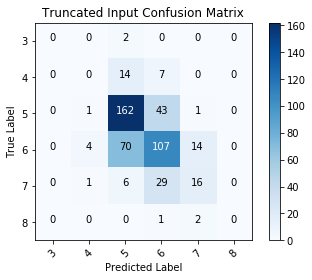

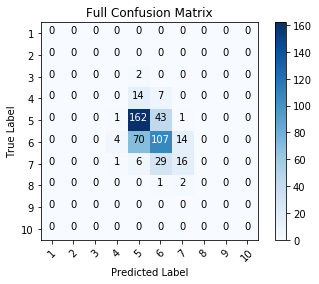

In [72]:
#The Decision Tree only outputs quality ratings 4-8 
#This adds the extra rows and columns to the confusion matrix so it contains everything from 1-10
def add_dims(matrix, num_at_beginning, num_at_end):
    #takes in the matrix, the number of low ratings not included, and the number of high ratings not included
    
    #creates a np array of zeros with the correct length
    temp = list(np.zeros(len(matrix[0])+num_at_beginning+num_at_end))
    return_matrix = []#sets up matrix which is getting returned
    for i in range(num_at_beginning):#sets up the low rows of the matrix with no values as 0s
        return_matrix.append(temp)
        
    #sets up an array of 0s to add to the current data
    beginning_zeros = list(np.zeros(num_at_beginning))
    ending_zeros = list(np.zeros(num_at_end))
    for i in range(len(matrix)):
        return_matrix.append(beginning_zeros + list(matrix[i]) + ending_zeros)#makes a full row with the smaller matrix & 0s
    
    #Adds a set of zero arrays at the end of the matrix
    for i in range(num_at_end):
        return_matrix.append(temp)
        
    return np.array(return_matrix).astype(int)

#Takes in the confusion matrix and plots it
def plot_conf_matrix(cm, classes, in_percent=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    #takes in the confusion matrix (cm), the class names, if the values should be reported in %, the title, and the color
    
    #gets the data in percent if specified by the user
    if in_percent:
        num_trials = sum(sum(cm))#gets the total number of values
        cm = 100*((cm+0.0)/num_trials)#gets the values in %
        cm = np.array(cm).astype(int)#makes each value an integer
    
    #Sets up the figure with title, tickmarks, axis labels,and a colorbar legend
    plt.figure()
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))#sets up tick marks with labels
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    #uses threshold for determining text color
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):#creates plot with text in it
        plt.text(j, i, cm[i,j], horizontalalignment = "center", color="white" if cm[i,j] > thresh else "black")

predictions = y_pred_entropy#Gets the predictions for the confusion matrix

#takes each output of the Decision Tree and uses the max value as the decision
predict = []
for i in range (len(predictions)):
    predict.append(predictions[i])

#takes the given solution from the csv and subtracts 3 because there were no output neurons for the first ratings 1 and 2
expected_nn_output = y_test

cm = confusion_matrix(expected_nn_output, predict)
full_cm = add_dims(cm,2,2)

pp = PdfPages('Wine_Confusion_Matricies.pdf')#creates pdf to save figures
plot_conf_matrix(cm, np.array([3,4,5,6,7,8]), False, "Truncated Input Confusion Matrix")
plt.savefig(pp, format='pdf')#appends the figure to the pdf
plot_conf_matrix(full_cm, np.array([1,2,3,4,5,6,7,8,9,10]), False, "Full Confusion Matrix")
plt.savefig(pp, format='pdf')#appends the figure to the pdf
pp.close()#closes the pdf and saves it

## Confusion Matrix for Gini Decision Tree

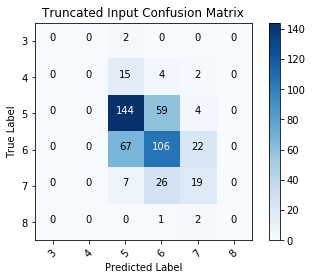

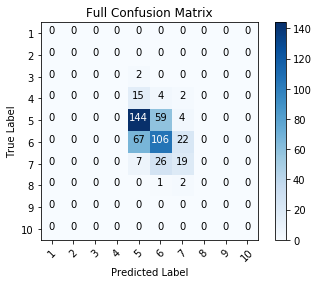

In [74]:
#The Decision Tree only outputs quality ratings 4-8 
#This adds the extra rows and columns to the confusion matrix so it contains everything from 1-10
def add_dims(matrix, num_at_beginning, num_at_end):
    #takes in the matrix, the number of low ratings not included, and the number of high ratings not included
    
    #creates a np array of zeros with the correct length
    temp = list(np.zeros(len(matrix[0])+num_at_beginning+num_at_end))
    return_matrix = []#sets up matrix which is getting returned
    for i in range(num_at_beginning):#sets up the low rows of the matrix with no values as 0s
        return_matrix.append(temp)
        
    #sets up an array of 0s to add to the current data
    beginning_zeros = list(np.zeros(num_at_beginning))
    ending_zeros = list(np.zeros(num_at_end))
    for i in range(len(matrix)):
        return_matrix.append(beginning_zeros + list(matrix[i]) + ending_zeros)#makes a full row with the smaller matrix & 0s
    
    #Adds a set of zero arrays at the end of the matrix
    for i in range(num_at_end):
        return_matrix.append(temp)
        
    return np.array(return_matrix).astype(int)

#Takes in the confusion matrix and plots it
def plot_conf_matrix(cm, classes, in_percent=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    #takes in the confusion matrix (cm), the class names, if the values should be reported in %, the title, and the color
    
    #gets the data in percent if specified by the user
    if in_percent:
        num_trials = sum(sum(cm))#gets the total number of values
        cm = 100*((cm+0.0)/num_trials)#gets the values in %
        cm = np.array(cm).astype(int)#makes each value an integer
    
    #Sets up the figure with title, tickmarks, axis labels,and a colorbar legend
    plt.figure()
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))#sets up tick marks with labels
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    #uses threshold for determining text color
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):#creates plot with text in it
        plt.text(j, i, cm[i,j], horizontalalignment = "center", color="white" if cm[i,j] > thresh else "black")

predictions = y_pred_gini#Gets the predictions for the confusion matrix

#takes each output of the Decision Tree and uses the max value as the decision
predict = []
for i in range (len(predictions)):
    predict.append(predictions[i])

#takes the given solution from the csv and subtracts 3 because there were no output neurons for the first ratings 1 and 2
expected_nn_output = y_test

cm = confusion_matrix(expected_nn_output, predict)
full_cm = add_dims(cm,2,2)

pp = PdfPages('Wine_Confusion_Matricies.pdf')#creates pdf to save figures
plot_conf_matrix(cm, np.array([3,4,5,6,7,8]), False, "Truncated Input Confusion Matrix")
plt.savefig(pp, format='pdf')#appends the figure to the pdf
plot_conf_matrix(full_cm, np.array([1,2,3,4,5,6,7,8,9,10]), False, "Full Confusion Matrix")
plt.savefig(pp, format='pdf')#appends the figure to the pdf
pp.close()#closes the pdf and saves it